Исследование деятельности интернет-магазина "Стримчик"

Описана деятельность интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


    Данный проект проводится с целью исследования индустрии компьютерных игр и прогнозирования объемов продаж и перспектив развития на 2017г.
    В ходе исследования необходимо выполнить следующие шаги:
    Шаг 1. Открыть файл с данными и изучить общую информацию:  
    Шаг 2. Подготовить данные
     -Заменить названия столбцов (приведите к нижнему регистру);
     -Преобразовать данные в нужные типы. 
     -Обработайте пропуски при необходимости.
     -Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец:
    Шаг 3. Провести исследовательский анализ данных
     -Посмотреть, сколько игр выпускалось в разные годы.
     -Посмотреть, как менялись продажи по платформам.
     -Посмотреть какие платформы лидируют по продажам.
     -Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
     -Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
     -Посчитать корреляцию между отзывами и продажами
     -Соотнести выводы с продажами игр на других платформах.
     -Посмотреть на общее распределение игр по жанрам. Оценить, что можно сказать о самых прибыльных жанрах
    Шаг 4. Составить портрет пользователя каждого региона
      Определить для пользователя каждого региона (NA, EU, JP):
    Самые популярные платформы (топ-5). Описать различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Определить влияет ли рейтинг ESRB на продажи в отдельном регионе?:
    Шаг 5. Проверить гипотезы
     Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:
     Шаг 6. Написать общий вывод
  



### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
game = pd.read_csv('/datasets/games.csv')
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В качестве данных имеется таблица game с данными по платформам, жанрам игр,году выпуска, продажами по регионам: Европа, США, Япония и другие, а также оценками пользователей, критиков и рейтингом.

### Подготовим данные

#### Заменим названия столбцов (приведем к нижнему регистру);

In [4]:
game.columns = map(str.lower, game.columns)

In [5]:
game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразуйем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

Посмотрим уникальные значения столбца год выпуска:

In [6]:
game['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Были обнаружены пропуски, которые не дадут нам изменить тип данных.Посчитаем их количество

In [7]:
game['year_of_release'].isna().sum()

269

Относительно общего объема данных (16715 строк), пропусков немного,заменим их нулевыми значениями.

In [8]:
game['year_of_release'] = game['year_of_release'].fillna(0)

Изменим тип данных на целые числа(int)

In [9]:
game['year_of_release'] = game['year_of_release'].astype(int)

Оценим уникальные значения столбца пользовательский рейтинг:

In [10]:
game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В ходе проверки были обнаружены пропуски и текстовые значения Tbd, что по данным интеренета означает что рейтинг еще не определен.

In [11]:
game[game['user_score'] =='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце 'user_score' тип данных (object), т.к. есть много строк (2424) с данными со значением tbd(to be determined), что означает "будет определено позднее".Однако нам необходимо иметь возможность сравнивать количественные показатели.Чтобы "не изменять статистику" заменим значения tbd на значения, не входящее в  референтную оценку(в данном примере на число -1)

In [12]:
game['user_score'] = game['user_score'].replace('tbd', -1)

Пропуски(nan) в данном столбце заменим  также на -1, т.к. значение 0 является реальной оценкой пользователей.

In [13]:
game['user_score'] = game['user_score'].fillna(-1)

In [14]:
game['user_score'] = game['user_score'].astype(float)

#### Обработатываем пропуски при необходимости:

Проверим оставшиеся пропуски в общей таблице game:

In [15]:
game.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

Обнаруживаем много пропусков в столбце оценка критиков.Для того,чтобы понять диапазон значений в данном столбце, рассмотрим уникальные значения.

In [16]:
game['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заменим пропуски в данном столбце нулями.

In [17]:
game['critic_score'] = game['critic_score'].fillna(0)

Проверям таблицу game на наличие явных дубликатов.

In [18]:
game.duplicated().sum()

0

Пропуски в столбце 'rating' оставляем без изменений.

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Создадим столбец total_sales, с суммой продаж по американскому, европейскому,японскому рынку и других продаж.

In [19]:
#game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

In [20]:
game['total_sales'] = game[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [21]:
display(game)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,-1.0,NaN,0.01


    В данном разделе были проверены данные на наличие пропусков и произведены замены в столбцах user_score на значение(-1), т.к.0, это действующая пользовательсая оценка, пропущенные значения в critic_score и year_of_release заменены нулями,также изменены типы данных в столбцах year_of_release на int, user_score на float.
    Большое количество пропусков было обнаружено в столбцах user_score, critic_score и rating, что может говорить что на момент сбора информации игры еще не вышли в продажу,рейтинг критиков, при плохих оценках, намерено скрыт производителем, а также отсутствие маркировки оейтинга,может говорить о том, что игра не содержит контента, подлежащего возрастной классификации.
    Таблица была проверена на наличие полных дубликатов.Были рассчитаны глобальные продажи и для них добавлен столбнец total_sales.

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [22]:
game['year_of_release'].value_counts(ascending=False);

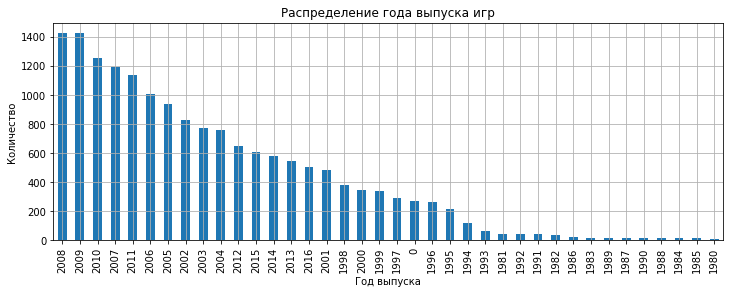

In [23]:
game['year_of_release'].value_counts().plot(kind='bar', grid=True, figsize=(12,4))
plt.title('Распределение года выпуска игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество');

In [24]:
game.query('0 < year_of_release <= 1997')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,-1.0,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,-1.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,-1.0,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,-1.0,NaN,28.31
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0.0,-1.0,NaN,20.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16326,Victory Spike,PS,1996,Sports,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16468,Meru Purana,PS,1996,Strategy,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16539,Grand Prix Legends,PC,1997,Racing,0.00,0.01,0.00,0.00,0.0,7.5,E,0.01
16666,Psychic Detective,PS,1995,Adventure,0.01,0.00,0.00,0.00,0.0,-1.0,NaN,0.01


Рассморев выпуск игр по годам, можем отметить,что до 1997 года(включительно) было выпущено прмерно 7.5%  игр от общего объема исследуемых игр. Исходя из этого считаю,что можно рассматривать данные  о выпуске игр
с 1998 года.

#### Посмотрим, как менялись продажи по платформам. Выбирем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


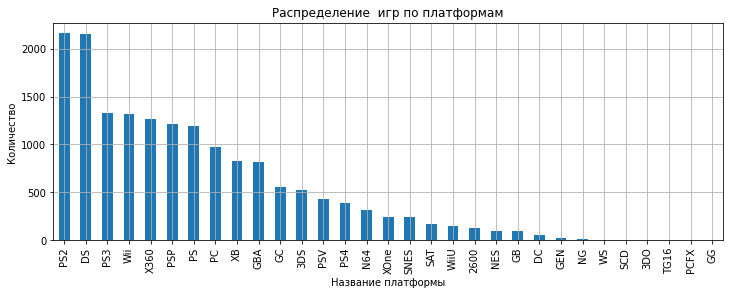

In [25]:
game['platform'].value_counts(ascending=False).plot(kind='bar', grid=True, figsize=(12,4))
plt.title('Распределение  игр по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество')
plt.ylabel('Количество');

In [26]:
game_platTop = game['platform'].value_counts().head()
game_platTop

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

Оценив распределение по платформам,видим, что самыми популярными по количеству игр за весь период  былиЖ
- PS2;
- DS;
- PS3.
    

Построим графики распределения продаж по наиболее популярным платформам за весь период:

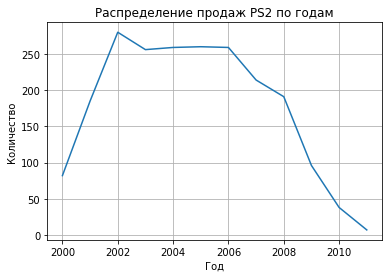

In [27]:
game.query('platform == "PS2" & year_of_release > 0').groupby(['year_of_release'])['total_sales'].count().plot( grid=True, figsize=(6,4))
plt.title('Распределение продаж PS2 по годам')
plt.xlabel('Год')
plt.ylabel('Количество');


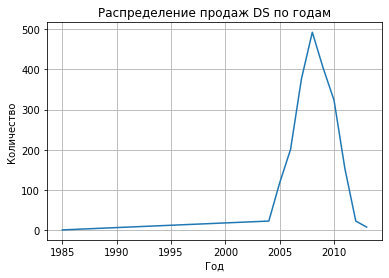

In [28]:
game.query('platform == "DS" & year_of_release > 0').groupby(['year_of_release'])['total_sales'].count().plot( grid=True, figsize=(6,4))
plt.title('Распределение продаж DS по годам')
plt.xlabel('Год')
plt.ylabel('Количество');

In [29]:
game.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,-1.0,NaN,0.02


По графику распределения продаж на DS мы видим одно аномальное значение года выпуска равное 1985, что скорее всего является ошибкой,т.к. по данным https://www.vgchartz.com данная игра выпущена в мае 2010г.

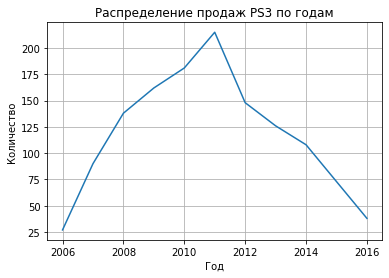

In [30]:
game.query('platform == "PS3" & year_of_release > 0').groupby(['year_of_release'])['total_sales'].count().plot( grid=True, figsize=(6,4))
plt.title('Распределение продаж PS3 по годам')
plt.xlabel('Год')
plt.ylabel('Количество');

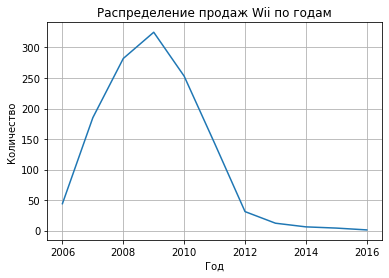

In [31]:
game.query('platform == "Wii" & year_of_release > 0').groupby(['year_of_release'])['total_sales'].count().plot( grid=True, figsize=(6,4))
plt.title('Распределение продаж Wii по годам')
plt.xlabel('Год')
plt.ylabel('Количество');

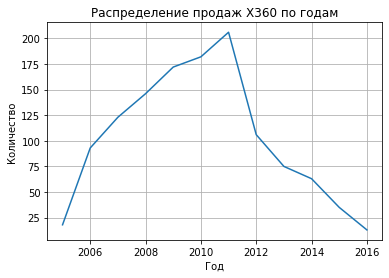

In [32]:
game.query('platform == "X360" & year_of_release > 0').groupby(['year_of_release'])['total_sales'].count().plot( grid=True, figsize=(6,4))
plt.title('Распределение продаж X360 по годам')
plt.xlabel('Год')
plt.ylabel('Количество');

Оценив графики распределения продаж  ТОП-5 платформ по годам, можно сделать вывод, что средний жизненный цикл платформы 10 лет.

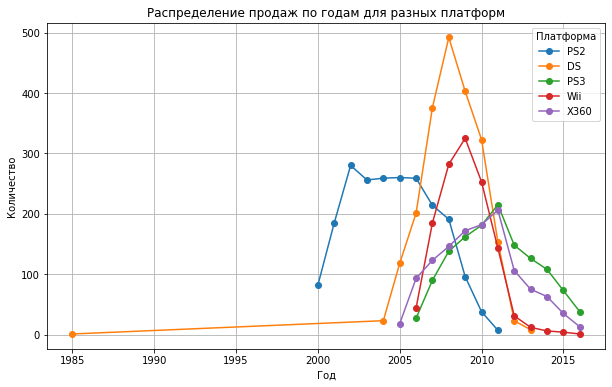

In [33]:
# Код ревьюера

import matplotlib.pyplot as plt

# Список платформ, которые хотим отобразить
platforms = ["PS2", "DS", "PS3", "Wii", "X360"]

# Начинаем создание графика
plt.figure(figsize=(10, 6))  # Задаем размер графика

# Проходим по каждой платформе в списке
for platform in platforms:
    # Фильтруем данные по платформе и группируем по годам выпуска
    sales_data = game.query(f'platform == "{platform}" & year_of_release > 0').groupby('year_of_release')['total_sales'].count()
    
    # Добавляем данные на график
    plt.plot(sales_data, marker='o', label=platform)

# Добавляем сетку, заголовок и подписи осей
plt.grid(True)
plt.title('Распределение продаж по годам для разных платформ')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Платформа')  # Легенда, чтобы различать платформы

# Отображаем график
plt.show()

#### Возьмьмем данные за соответствующий актуальный период. Актуальный период определяем самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.


 В качестве актуального периода возьмем период за последний 5 лет 2012-2016гг.

Сортируем таблицу game и создаем таблицу game_period по выбранному временному периоду.

In [34]:
game_period = game.query('year_of_release >= 2012')

In [35]:
game_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,-1.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.


In [36]:
(game_period.pivot_table( index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum'));



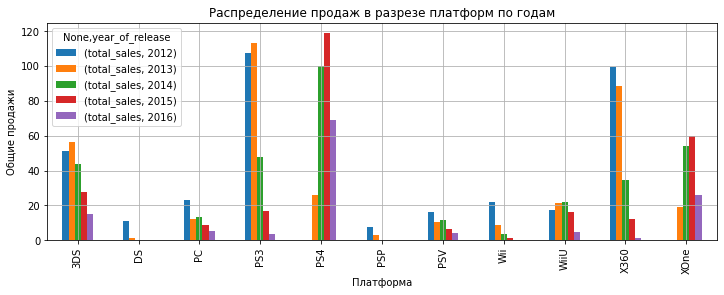

In [37]:
ax = (game_period.pivot_table( index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')).unstack().plot(kind='bar', grid=True, figsize=(12,4))
plt.title('Распределение продаж в разрезе платформ по годам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');


По данным графика и сводной таблицы делаем вывод,что лидируют следующие 5 платформ:
     1. PS4
     2. PS3
     3. X360
     4. 3DS
     5. XOne
 Однако рассматривая динамику продаж по годам,мы видим спад продаж по всем платформам  и, продажи к 2016 году по некторым платформам незначительные, и, возможно,было бы  целесообразнее, для планирования продаж на 2017г. оценить  только период 2016 гг.   

Оценим продажи в разрезе платформ за новый,выбранный период 2016г.

In [38]:
game_period2 = game.query('year_of_release == 2016')
display(game_period2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,-1.0,NaN,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,-1.0,NaN,0.01


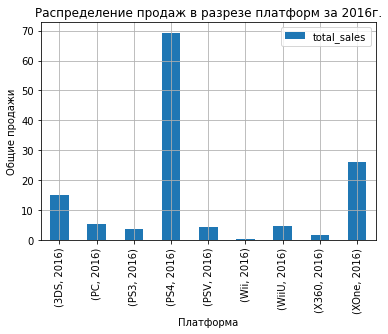

In [39]:
(game_period2.pivot_table( index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')).plot(kind='bar', grid=True)
plt.title('Распределение продаж в разрезе платформ за 2016г.')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');


По данным графика делаем вывод, что  в 2016 году наиболее переспективны платформы  PS4 и XOne, 3DS.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.


In [40]:
game_periodPivot=game_period2.pivot_table(index=['platform','year_of_release'], values= 'total_sales', aggfunc ='sum').reset_index()
display(game_periodPivot)

,platform,year_of_release,total_sales
0,3DS,2016,15.14
1,PC,2016,5.25
2,PS3,2016,3.60
3,PS4,2016,69.25
4,PSV,2016,4.25
5,Wii,2016,0.18
6,WiiU,2016,4.60
7,X360,2016,1.52
8,XOne,2016,26.15


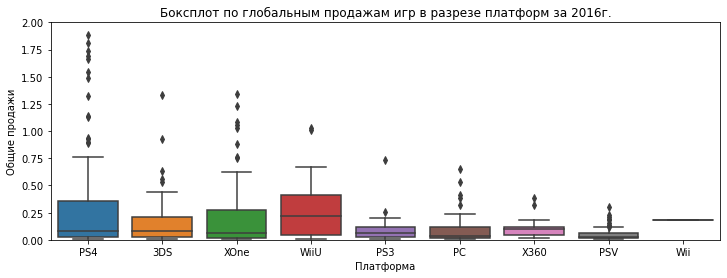

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(x='platform', y='total_sales', data=game_period2)
plt.ylim([0,2])
plt.title('Боксплот по глобальным продажам игр в разрезе платформ за 2016г.')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');

По полученному выше графику, видим, что имеется очень много выбросов ис ложно оценить полученный результат.Ограничим график по оси y значением 0.8.

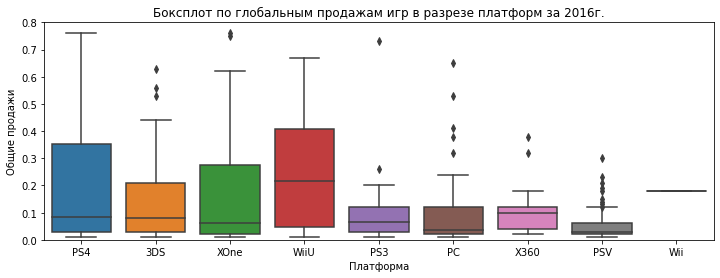

In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(x='platform', y='total_sales', data=game_period2)
plt.ylim([0,0.8])
plt.title('Боксплот по глобальным продажам игр в разрезе платформ за 2016г.')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Для анализа возьмем наиболее популярную платформу PS4. Сформируем новую таблицу по выбранной платформе, и также отсеим данные по рейтингу пользователей и критиков, где были заменены пропущенные значения.

In [43]:
game_period2PS4 = game_period2.query('platform == "PS4" & user_score > -1 & critic_score > 0')


Построим диаграммы рассеяния, проверим есть ли корреляция между 'critic_score', 'user_score' и'total_sales'.

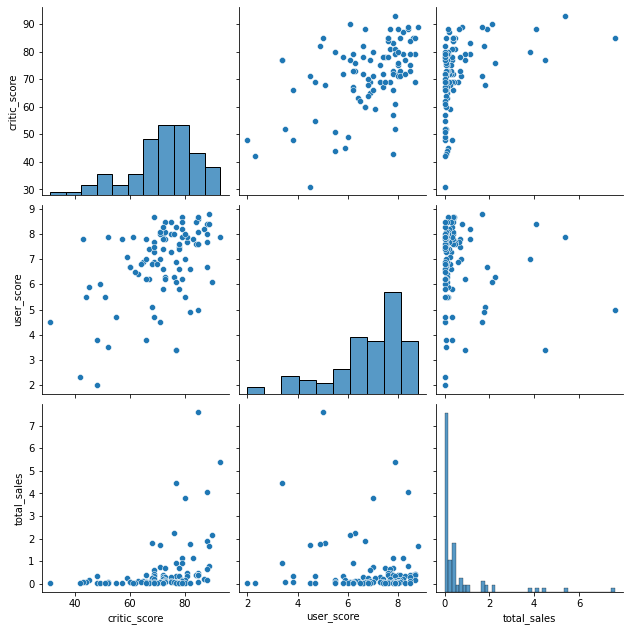

In [44]:
sns.pairplot(game_period2PS4[['critic_score', 'user_score', 'total_sales']])
plt.gcf().set_size_inches(9,9);

Рассчитаем коэффициенты корреляции:

In [45]:
corrPS4 = game_period2PS4[['critic_score', 'user_score', 'total_sales']].corr()
display(corrPS4)


,critic_score,user_score,total_sales
critic_score,1.000000,0.480147,0.375504
user_score,0.480147,1.000000,-0.120534
total_sales,0.375504,-0.120534,1.000000


По данным расчетов,видим положительную взаимосвязь между оценкой критиков и суммарными продажами, между оценками пользователей и продажами видим небольшую отрицательную корреляцию.
Возможно оценки критиков заслуживают "большего доверия",чем пользовательские.

#### Соотнесем выводы с продажами игр на других платформах.

Для сравнения и анализа возьмем еще две популярные в 2016 г. платформы: XOne и 3DS.

In [46]:
game_period2XOne = game_period2.query('platform == "XOne" & user_score > -1 & critic_score > 0')


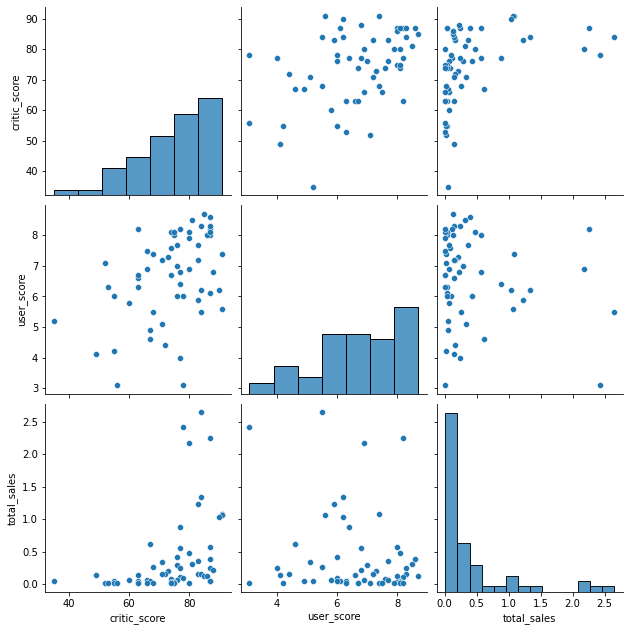

In [47]:
sns.pairplot(game_period2XOne[['critic_score', 'user_score', 'total_sales']])
plt.gcf().set_size_inches(9,9);

In [48]:
corrXOne = game_period2XOne[['critic_score', 'user_score', 'total_sales']].corr()
display(corrXOne)

,critic_score,user_score,total_sales
critic_score,1.000000,0.426034,0.407125
user_score,0.426034,1.000000,-0.179308
total_sales,0.407125,-0.179308,1.000000


В данном случае мы видим иную картину: в отличает от PS4, XOne имеет положительную корреляции и общих продаж с отзывами критиков, и общих продаж с отзывами пользователей.

In [49]:
game_period23DS = game_period2.query('platform == "3DS" & user_score > -1 & critic_score > 0')


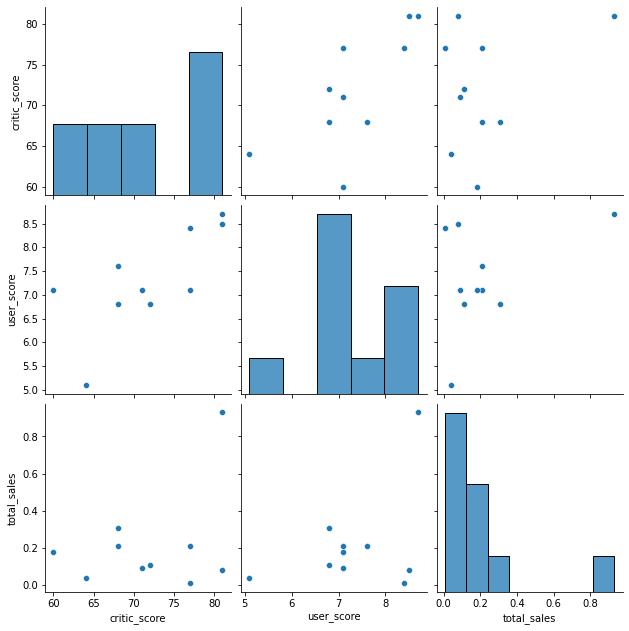

In [50]:
sns.pairplot(game_period23DS[['critic_score', 'user_score', 'total_sales']])
plt.gcf().set_size_inches(9,9);

In [51]:
corr3DS = game_period23DS[['critic_score', 'user_score', 'total_sales']].corr()
display(corr3DS)

,critic_score,user_score,total_sales
critic_score,1.000000,0.721313,0.338408
user_score,0.721313,1.000000,0.406123
total_sales,0.338408,0.406123,1.000000


По платформе 3DS ситуация аналогичная платформе XOne

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?



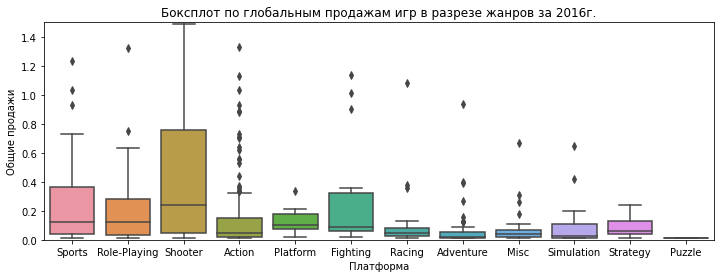

In [52]:
plt.figure(figsize=(12,4))
sns.boxplot(x='genre', y='total_sales', data=game_period2)
plt.ylim([0,1.5])
plt.title('Боксплот по глобальным продажам игр в разрезе жанров за 2016г.')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');

Наиболее популярными жанрами игр являются:
    -Shooter
    -Sports
    -Role-Playing

### Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж

In [53]:
game_period2.groupby('platform')['na_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,platform,mean,sum,count
0,PS4,0.131037,21.49,164
1,XOne,0.164023,14.27,87
2,3DS,0.090000,4.14,46
3,WiiU,0.150000,2.10,14
4,PC,0.025185,1.36,54


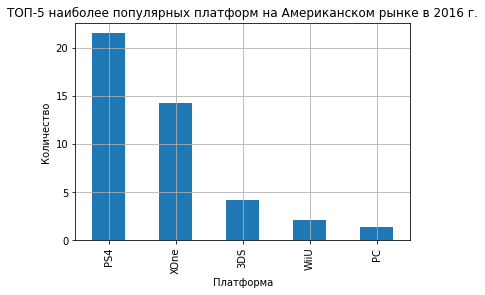

In [54]:
game_period2.groupby('platform')['na_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'platform', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных платформ на Американском рынке в 2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Количество');

In [55]:
game_period2.groupby('platform')['eu_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,platform,mean,sum,count
0,PS4,0.193780,31.78,164
1,XOne,0.110690,9.63,87
2,PC,0.065370,3.53,54
3,3DS,0.050652,2.33,46
4,WiiU,0.105714,1.48,14


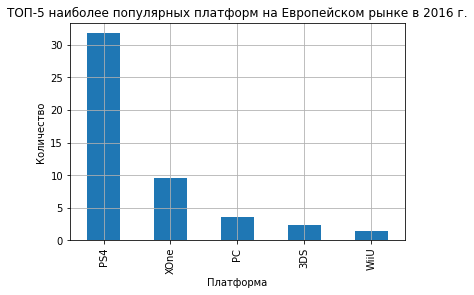

In [56]:
game_period2.groupby('platform')['eu_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'platform', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных платформ на Европейском рынке в 2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Количество');

In [57]:
game_period2.groupby('platform')['jp_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,platform,mean,sum,count
0,3DS,0.174565,8.03,46
1,PS4,0.035000,5.74,164
2,PSV,0.041882,3.56,85
3,PS3,0.034211,1.30,38
4,WiiU,0.047857,0.67,14


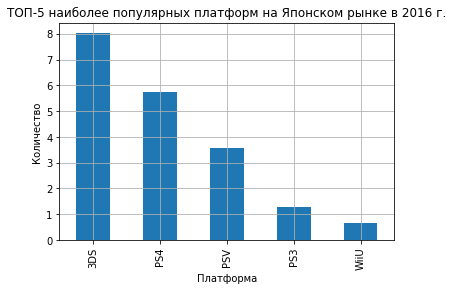

In [58]:
game_period2.groupby('platform')['jp_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'platform', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных платформ на Японском рынке в 2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Количество');

Рассмотрев ТОП-5платформ,для пользователей каждого сегмента рынка, можем сделать выводы:
наиболее популярные платформы на американском рынке:
- PS4
- XOne
- 3DS
- WiiU
- PC
на европейском рынке:
- PS4
- XOne
- PC
- 3DS
- WiiU
на японском рынке:
- 3DS
- PS4
- PSV
- PS3
- WiiU.
   

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

In [59]:
game_period2.groupby('genre')['na_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,genre,mean,sum,count
0,Shooter,0.345532,16.24,47
1,Action,0.052191,9.29,178
2,Sports,0.157083,7.54,48
3,Role-Playing,0.109074,5.89,54
4,Fighting,0.115000,1.84,16


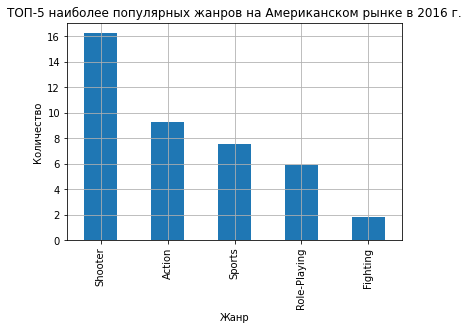

In [60]:
game_period2.groupby('genre')['na_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'genre', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных жанров на Американском рынке в 2016 г.')
plt.xlabel('Жанр')
plt.ylabel('Количество');

In [61]:
game_period2.groupby('genre')['eu_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,genre,mean,sum,count
0,Shooter,0.338298,15.90,47
1,Sports,0.250208,12.01,48
2,Action,0.060000,10.68,178
3,Role-Playing,0.079259,4.28,54
4,Racing,0.073750,1.77,24


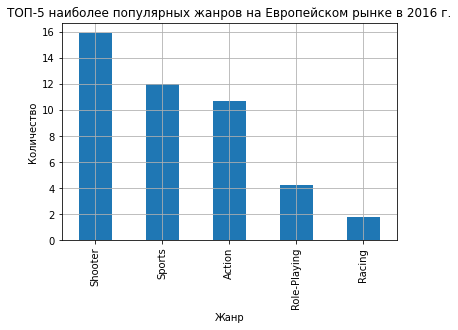

In [62]:
game_period2.groupby('genre')['eu_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'genre', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных жанров на Европейском рынке в 2016 г.')
plt.xlabel('Жанр')
plt.ylabel('Количество');

In [63]:
game_period2.groupby('genre')['jp_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index()


,genre,mean,sum,count
0,Action,0.039719,7.07,178
1,Role-Playing,0.122407,6.61,54
2,Adventure,0.021071,1.18,56
3,Shooter,0.022553,1.06,47
4,Misc,0.032500,1.04,32


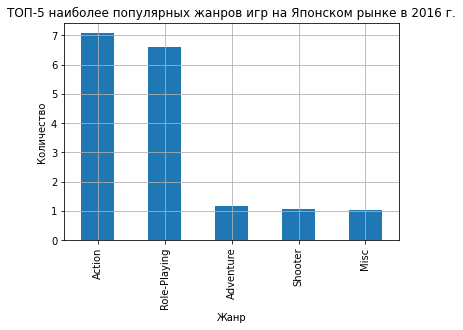

In [64]:
game_period2.groupby('genre')['jp_sales'].agg({'count', 'sum', 'mean'}).sort_values(by = 'sum', ascending = False).head().reset_index().plot(x = 'genre', y = 'sum', kind = 'bar', grid=True, legend=False)
plt.title('ТОП-5 наиболее популярных жанров игр на Японском рынке в 2016 г.')
plt.xlabel('Жанр')
plt.ylabel('Количество');

В разрезе жанров американский рынок имеет следующий ТОП-5 :
    - Shooter
    - Action
    - Sports
    - Role-playing
    - Fighting
 европейский рынок : 
    - Shooter
    - Sports
    - Action
    - Role-Playing
    - Racing
 японский рынок :
    - Action
    - Role-Playing
    - Adventure
    - Shooter
    - Misc

#### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
game_period2['rating'].unique()

array(['E', nan, 'T', 'M', 'E10+'], dtype=object)

<AxesSubplot:title={'center':'Соотношение типов рейтинга'}, ylabel='rating'>

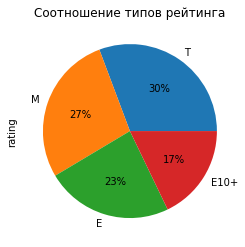

In [66]:
game_period2['rating'].value_counts().plot(kind='pie', title='Соотношение типов рейтинга', autopct='%i%%')

In [67]:
game_period2.pivot_table(index='rating', values='total_sales', aggfunc = sum).reset_index()

,rating,total_sales
0,E,25.74
1,E10+,9.13
2,M,38.35
3,T,24.12


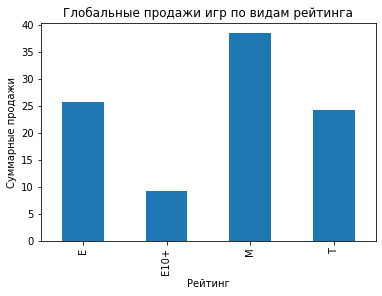

In [68]:
game_period2.pivot_table(index='rating', values='total_sales', aggfunc = sum).reset_index().plot(kind='bar', x='rating', y='total_sales', legend=False)
plt.title('Глобальные продажи игр по видам рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Суммарные продажи');

Согласно данным википедии, классификации ESRB есть следующие виды рейтингов:
     -«EC» («Early childhood») — «Для детей младшего возраста»
    - «E» («Everyone») — «Для всех»:
    - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
    - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет    
        
        По вышепроизведенной оценке можем сделать вывод, что рейтинг влияет на продажи и больше продаж у игр категории "для взрослых" и "для всех".
        

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезы:
    Но: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1: Средние пользовательские рейтинги платформ Xbox One и PC разные
        

Т.к. мы имеем дело со средними рейтингами 2-х независимых выборок, то для проверки гипотез будем использовать метод,  st.ttest_ind. Будем использовать двухстороннюю гипотезу,т.к. не знаем в сторону уменьшения или увеличения отличаются рейтинги.

In [69]:
PS4 = game_period2PS4['user_score'] 
XOne = game_period2XOne['user_score']


In [70]:
from scipy import stats as st 
alpha = 0.05 # уровень статистической значимости
PS4 = game_period2PS4['user_score'] 
XOne = game_period2XOne['user_score']
results = st.ttest_ind(XOne, PS4)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые') 


p-значение: 0.41864445657790605
Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые


#### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Ho: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

H1: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются

В данном случае мы также имеем дело со средними рейтингами 2-х независимых выборок, поэтому для проверки гипотез будем использовать метод,  st.ttest_ind. Будем использовать двухстороннюю гипотезу,т.к. не знаем в  какую сторону имеются отличия  в рейтинге.

In [71]:
Action = game_period2.query('genre == "Action" & user_score >-1')
Sports = game_period2.query('genre == "Sports" & user_score > -1')


In [72]:

alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги  жанров Action и Sports равны')
else:
    print('Не отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports отличаются') 

p-значение: 0.000347482871898091
Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги  жанров Action и Sports равны


Таким образом можем сделать выводы, о том, что мы не отвергнаем нулевую гипотезу, говорящую о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
А также мы  отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

Вывод:
    По итогам проведенного исследования можно сделать следующие выводы:
    была исследована таблица game, в которой были выявлены пропуски и заполнены подходящими данными,были изменены типы данных,где это потребовалось. Были рассчитаны суммарные продажи по регионам (total_sales), было рассмотрено распределение количества игр по годам,  и выявлено что наибольшее количество игр за весь период выпускалось на PS2, DS и PS3. Были рассмотрены
    графики в разрезе платформы по годам и определен средний жизненный цикл платформы(10 лет).
    Был выбран 5-летний период 2012-2016гг.для дальнейшего анализа и рассмотрены распределение продаж в разрезе платформ по годам и с помощью графика было выявлено, что наблюдается спад продаж по всем платформам  и, продажи к 2016 году по некторым платформам незначительные, и, возможно,было бы  целесообразнее, для планирования продаж на 2017г. оценить  только период 2016 гг, т.к.рынок меняет,одни платформы заменяют другие и в целом количество выпускаемых игр значительно уменьшается.По данным графика делаем вывод, что  в 2016 году наиболее переспективны платформы  PS4 и XOne, 3DS.
    Исследовано влияние рейтингов пользователей  и критиков на общие продажи платформы PS4. По данным расчетов,видим положительную взаимосвязь между оценкой критиков и суммарными продажами, между оценками пользователей и продажами видим небольшую отрицательную корреляцию.Возможно оценки критиков заслуживают "большего доверия",чем пользовательские.Для сравнения проведены  также оценки по 2-м другим популярным платформам ХОne и 3DS.В данном случае мы видим иную картину: в отличает от PS4, XOne и 3DS имеет положительную корреляции и общих продаж с отзывами критиков, и общих продаж с отзывами пользователей.
    Определены наиболее популярные жанры игр по всем пользователям: наиболее популярными жанрами игр являются: -Shooter -Sports -Role-Playing.
    Рассмотрены платформы и жанры в разрезе рынков,на основании чего можно составить примерный "портрет" пользователя каждого рынка: 
                  Американский рынок:
                  
наиболее популярные платформы :     Наиболее популярные жанры:
    
- PS4                                - Shooter
- XOne                               - Action
- 3DS                                - Sports
- WiiU                               - Role-playing
- PC                                 - Fighting

                 Европейский рынок:
- PS4                                - Shooter
- XOne                               - Sports
- PC                                 - Action
- 3DS                                - Role-Playing
- WiiU                               - Racing
 
                  Японский рынок:
- 3DS                                - Action
- PS4                                - Role-Playing
- PSV                                 - Adventure
- PS3                                 - Shooter
- WiiU                                - Misc
    
    Оценено влияние рейтинга ESTB на продажи и выявлено, что рейтинг влияет на продажи и больше продаж у игр категории "для взрослых" и "для всех".
    Также были проверены статистические гипотезы и сделаны выводы о том, что не удалось отвергнуть нулевую гипотезу, говорящую о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.А кроме этого мы отвергли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.
    

    